# HPA Workshop: Tasmanian Devil Cancer Analysis

Welcome to this workshop!

In the process of this session, you will:
* Get hands-on experience working processing some real cancer data
* Have a basic introduction to supervised neural networks
* * Play around with different ways to get information into the network
* Be introduced to some un-supervised techniques for anomaly detection


There is a lot of text and explanations on this notebook - you can process them at your own speeds (or ignore them entirely). The following key is used:
1. Text in black is background information
2. <font color='red'>**Text in red is a task you should complete**</font>
3. <font color='blue'>**Text in blue is a question to think about as a group**</font>

## Quick Recap: Tasmanian Devils

To briefly recap Zemin's presentation:
1. Tasmanian Devils suffer from a form of transmissible cancer, which gives them 'Devil Facial Disease' (DFTD)
2. This cancer shows signs of `chromothripsis', a catastrophic genomic rearrangement
3. In addition to rearrangement, there are signs of large scale deletions and duplications of sections of the DNA
4. Chromothripsis shows similar patterns in other forms of cancer; human oesophogeal and prostate cancer, for example
## Our Goals

Our research (and your task today) is to find a way to classify and study this cancer -- in the hope that we may then extend it from this easier case<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) to studying the more complex forms.

To do this, we must first:
1. Label the data (this has been done for us!)
2. Process the data into useable form
3. Set-up and then train a Neural Network Classifier
4. Utilise some form of un-supervised methods to detect variations that are not contained within our labels




<a name="cite_note-1"></a>1. [^](#cite_ref-1) Tasmanian Devils went through a genetic bottleneck (hence the transmissible cancer), and so they are all genetically very similar. This makes their genomes relatively homogeneous with respect to one another

## Coverage Data
Let's first look at some coverage data. 

It helps to first understand why duplications/deletions result in coverage variations:

<img src="../Images/coverageExplain.png" />

### Our Data
(((WHERE WILL THE DATA BE???)))

When we come to do this for real, we would work on the entire genome at once. However, for ease of use we have pre-selected the portions of interest to us. The datafiles represent a `super chromosome' formed by joining Chromosomes 4 and 5 into one long chain. This is an artifice to make this workshop run easier!


<font color='red'>**Run the code below, varying the dataThinning values and the data until you feel that you have a handle on the data**</font>

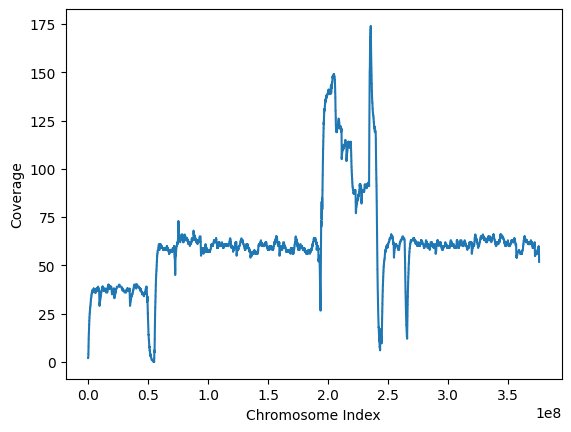

In [23]:
from matplotlib import pyplot as plt
file = "../Data/James.dat"

dataThinning = 0.999 #This value controls the level of smoothing applied to the data. 0 is the raw data, 0.99(etc) is very smooth.
baseSkipping = 70 #This value controls the base-sampling rate. Higher values makes the code run quicker, but uses less information
s = deforest.DataStruct(file,dataThinning,baseSkipping)

plt.plot(s.Index,s.Coverage)
plt.ylabel("Coverage")
plt.xlabel("Chromosome Index")
plt.show()

What problems can you think we might have to overcome, in order to get this data into a form useable for machine learning?



In [22]:
import deforest
from matplotlib import pyplot as pt
from scipy import special
import numpy as np
import os
from tqdm import tqdm

In [2]:
def myFunction(k,nu):
	gamma = 0.99
	sigma = 3
	sigma2 = 10
	return deforest.dualBinomial(k,nu,gamma,sigma,sigma2)

[]

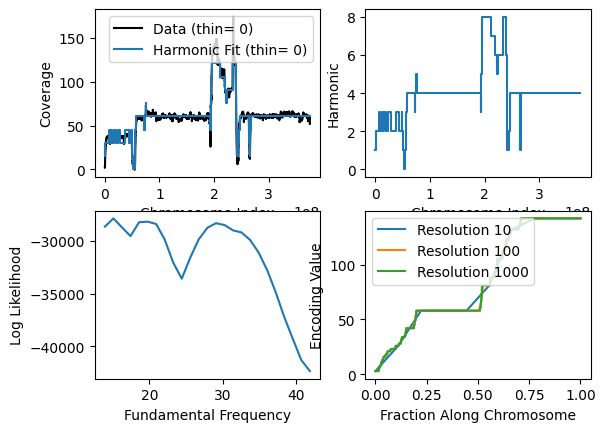

In [4]:
file = "../Data/James.dat"
fig,axs = pt.subplots(2,2)

preSmoothing = 0.999
dataSkip = 100
s = deforest.DataStruct(file,preSmoothing,dataSkip)


N = deforest.Network(8,1e6)
r = N.Navigate(s,myFunction)

[xx,yy] = r.GetPlottingPath(s) 
axs[0][0].plot(s.Index,s.Coverage,'k',label="Data (thin= " + str(0) + ")")
axs[0][0].plot(xx,yy,label="Harmonic Fit (thin= " + str(thin) + ")")
axs[0][0].legend()
axs[0][0].set_xlabel("Chromosome Index")
axs[0][0].set_ylabel("Coverage")
axs[0][1].plot(xx,yy/r.Nu)
axs[0][1].set_xlabel("Chromosome Index")
axs[0][1].set_ylabel("Harmonic")
axs[1][0].plot(N.nus,N.scores)

for res in [10,100,1000]:
    z = r.GetHash(s,N.JumpSize,'sum',res)
    axs[1][1].plot(np.linspace(0,1,len(z)),z,label="Resolution " + str(res))

axs[1][1].legend()
axs[1][0].set_xlabel("Fundamental Frequency")
axs[1][0].set_ylabel("Log Likelihood")
axs[1][1].set_xlabel("Fraction Along Chromosome")
axs[1][1].set_ylabel("Encoding Value")
pt.plot()